In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("add.csv")
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [7]:
df.isnull().sum()

id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64

In [8]:
df.describe()

,id,age,click
count,10000.000000,10000.000000,10000.000000
mean,5060.211400,40.239200,0.650000
std,2861.758265,13.116912,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,40.000000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               10000 non-null  float64
 3   gender            10000 non-null  object 
 4   device_type       10000 non-null  object 
 5   ad_position       10000 non-null  object 
 6   browsing_history  10000 non-null  object 
 7   time_of_day       10000 non-null  object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


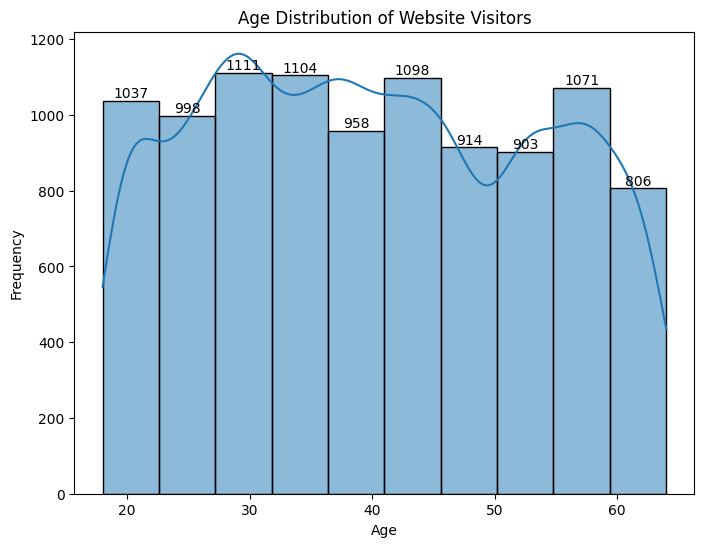

In [11]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['age'], kde=True, bins=10)

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  
        ax.text(patch.get_x() + patch.get_width() / 2, height + 0.5,  
                int(height),  
                ha='center', va='bottom', fontsize=10, color='black')
plt.title('Age Distribution of Website Visitors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



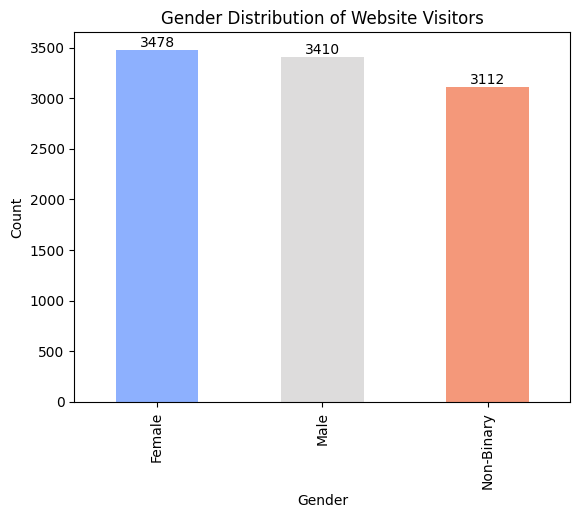

In [26]:

colors = sns.color_palette('coolwarm', n_colors=len(df['gender'].value_counts()))
ax = df['gender'].value_counts().plot(kind='bar', color=colors)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Gender Distribution of Website Visitors')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



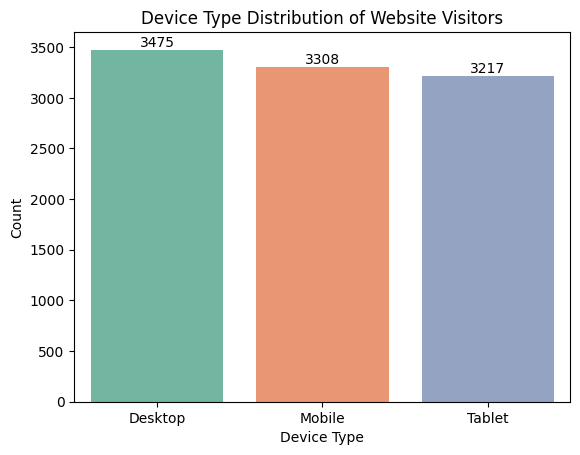

In [36]:

ax = sns.countplot(x='device_type', data=df,hue='device_type', palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Device Type Distribution of Website Visitors')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()


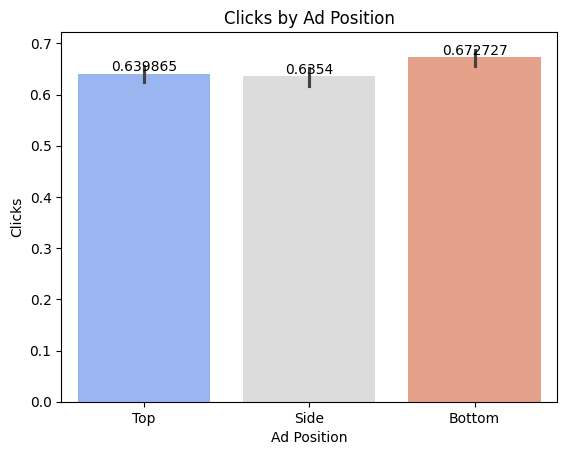

In [33]:
ax = sns.barplot(x='ad_position', y='click', data=df, hue='ad_position', palette='coolwarm')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Clicks by Ad Position')
plt.xlabel('Ad Position')
plt.ylabel('Clicks')
plt.show()


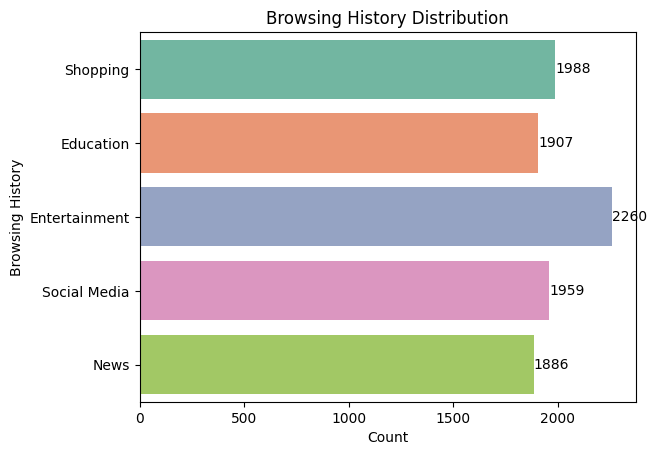

In [38]:

ax = sns.countplot(y='browsing_history', data=df,hue='browsing_history', palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Browsing History Distribution')
plt.xlabel('Count')
plt.ylabel('Browsing History')
plt.show()



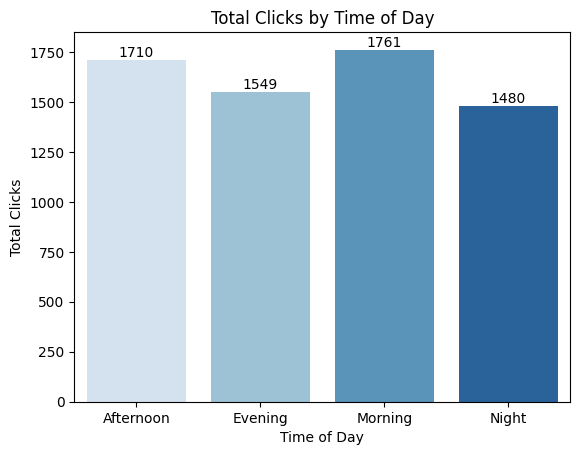

In [41]:
clicks_by_time = df.groupby('time_of_day')['click'].sum().reset_index()


ax= sns.barplot(x='time_of_day', y='click', data=clicks_by_time, hue='time_of_day', palette='Blues')  
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Total Clicks by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Clicks')
plt.show()


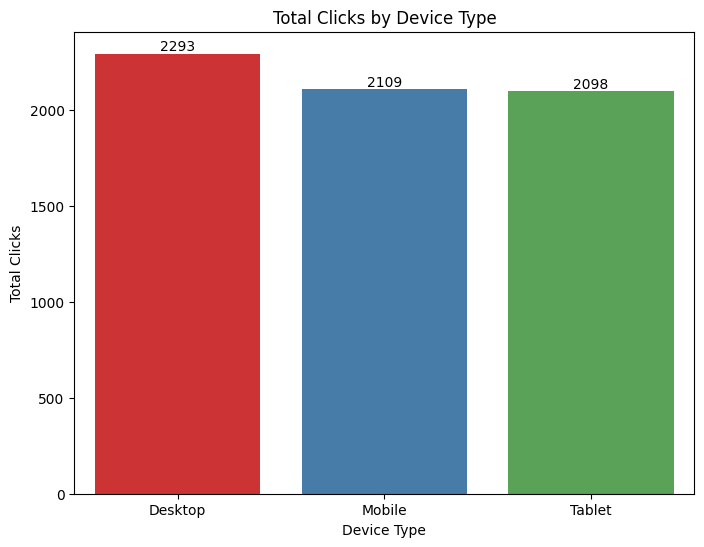

In [44]:

clicks_by_device = df.groupby('device_type')['click'].sum().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='device_type', y='click', data=clicks_by_device,hue='device_type', palette='Set1') 
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Total Clicks by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Total Clicks')
plt.show()


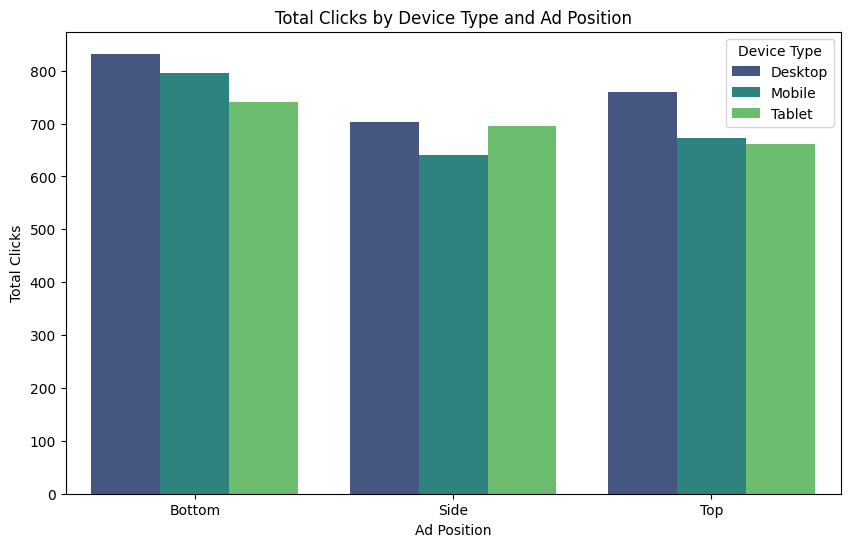

In [45]:

clicks_by_device_and_ad = df.groupby(['device_type', 'ad_position'])['click'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ad_position', y='click', hue='device_type', data=clicks_by_device_and_ad, palette='viridis')

plt.title('Total Clicks by Device Type and Ad Position')
plt.xlabel('Ad Position')
plt.ylabel('Total Clicks')
plt.legend(title='Device Type')
plt.show()


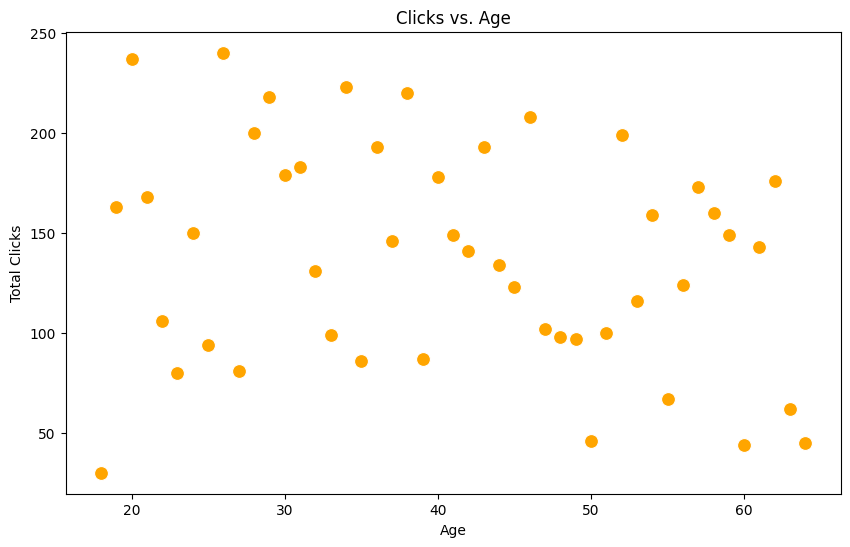

In [56]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='click', data=clicks_by_age, color='orange', s=100)  # s for marker size

plt.title('Clicks vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Clicks')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8684\3240704454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=df, palette='Set2')


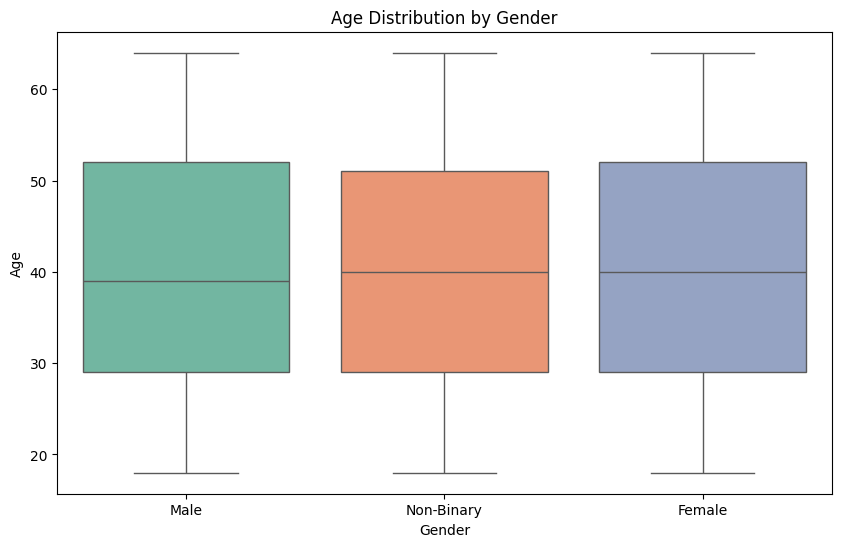

In [58]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df, palette='Set2')

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()
